In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler 

data = pd.read_csv('https://raw.githubusercontent.com/swapnilsaurav/Dataset/master/FB_Fin_Data.csv')
main_data = data
scaler = MinMaxScaler(feature_range=(0,1))
prediction_days = 60
data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
X_train = []
y_train = []
for i in range(prediction_days, len(data)):
  X_train.append(data[i-prediction_days:i,0])
  y_train.append(data[i,0])

print(y_train)


[0.035543365372211866, 0.033150591520270556, 0.03267203936016683, 0.03650047404289358, 0.03597840844001382, 0.03580438512222922, 0.03532582861165123, 0.03476028001931486, 0.03898024432706754, 0.04119896440790494, 0.037675089020816566, 0.03593489499723784, 0.02927867384808719, 0.03932825615884333, 0.041634037929026146, 0.046027990750770076, 0.03636996851835911, 0.032541529485158205, 0.03419473142697843, 0.028843630780285234, 0.027930035552379495, 0.020534212039788502, 0.021491320710470163, 0.0207082353575731, 0.015270142629121408, 0.017619398687812537, 0.019055063869072186, 0.01940311050464144, 0.017227873413260764, 0.014835099561319454, 0.019098577311848164, 0.0318454710178131, 0.027712498791818863, 0.02971371256541494, 0.0286260940197246, 0.028278082187948805, 0.027973548995155473, 0.028234568745172828, 0.02297049933450579, 0.028278082187948805, 0.026537888164370083, 0.02236143294891918, 0.02714695019948249, 0.027799525677370873, 0.03650047404289358, 0.03480379346209084, 0.03519531873

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import numpy as np
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
def LSTM_Analysis():
  model = Sequential()
  model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))
  
  model.add(LSTM(units=50))
  model.add(Dropout(0.2))
  model.add(Dense(units=1))
  return model

md = LSTM_Analysis()
md.summary()
md.compile(optimizer='adam', loss='mean_squared_error')
  



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
chkpointer = ModelCheckpoint(filepath='weights_best.hdf5', save_best_only = True)
md.fit(X_train, y_train, epochs=35, batch_size = 32, callbacks=[chkpointer])


Epoch 1/35
46/46 [==============================] - 10s 94ms/step - loss: 0.0172
Epoch 2/35
46/46 [==============================] - 4s 95ms/step - loss: 0.0032
Epoch 3/35
46/46 [==============================] - 4s 94ms/step - loss: 0.0036
Epoch 4/35
46/46 [==============================] - 4s 95ms/step - loss: 0.0032
Epoch 5/35
46/46 [==============================] - 4s 93ms/step - loss: 0.0031
Epoch 6/35
46/46 [==============================] - 7s 156ms/step - loss: 0.0032
Epoch 7/35
46/46 [==============================] - 4s 95ms/step - loss: 0.0029
Epoch 8/35
46/46 [==============================] - 5s 107ms/step - loss: 0.0027
Epoch 9/35
46/46 [==============================] - 4s 95ms/step - loss: 0.0026
Epoch 10/35
46/46 [==============================] - 4s 96ms/step - loss: 0.0026
Epoch 11/35
46/46 [==============================] - 4s 96ms/step - loss: 0.0024
Epoch 12/35
46/46 [==============================] - 4s 95ms/step - loss: 0.0024
Epoch 13/35
46/46 [===============

In [ ]:
from google.colab import files
upload_data = files.upload()
test_data = upload_data


In [6]:
data2 = pd.read_csv('https://raw.githubusercontent.com/swapnilsaurav/Dataset/master/FB_Fin_Data.csv')
actual_values = data2['Close'].values
new_data = pd.concat((main_data['Close'],data2['Close']),axis=0)

X_test2 =[]
md_input = new_data[len(new_data) - len(data2)-prediction_days:].values
md_input = md_input.reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

md_input = scaler.fit_transform(md_input)
for i in range(prediction_days, len(md_input)):
  X_test2.append(md_input[i-prediction_days:i,0])
#print(X_test2)

In [8]:
X_test2 = np.array(X_test2)
#print(X_test2.shape[1])
X_test2 = np.reshape(X_test2,(X_test2.shape[0], X_test2.shape[1],1))
#print(X_test2)
predicted_close = md.predict(X_test2)
predicted_close = scaler.inverse_transform(predicted_close)
print(predicted_close)

[[267.77893]
 [254.29305]
 [230.61888]
 ...
 [266.36578]
 [266.72232]
 [267.23804]]


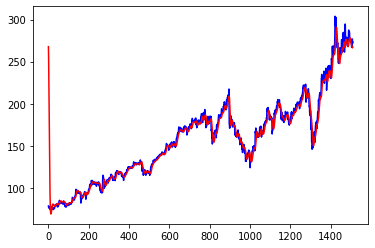

In [10]:
import matplotlib.pyplot as plt
plt.plot(actual_values, color="blue")
plt.plot(predicted_close, color="red")
plt.show()

Saving FB.csv to FB.csv
